In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#If a node has more active promoters than opressers, it will be active.
def updateGraphNew(G):
    changeNodes = []
    for node in G.nodes:
        edgeSum = 0
        for link in G.in_edges(node,data=True):
            edgeSum += G.nodes[link[0]]["active"]*link[2]["weight"]
        if edgeSum > 0:
            changeNodes.append([node,1])
        else:
            changeNodes.append([node,0])
    for nodeActivity in changeNodes:
        G.nodes[nodeActivity[0]]["active"] = nodeActivity[1]

def ratioActive(G,N):
    numactive = 0
    for node in G.nodes:
        numactive += G.nodes[node]["active"]
    return (numactive/N)

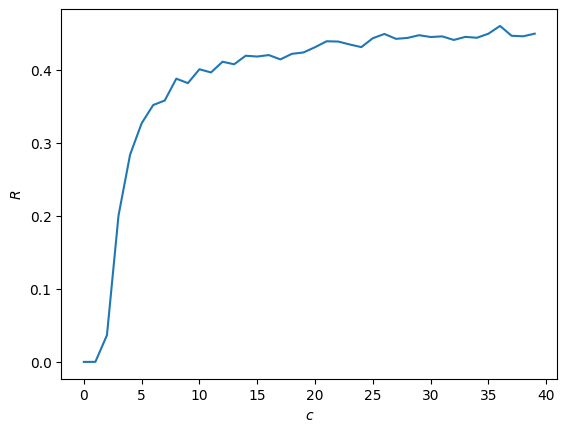

In [3]:
N = 1000
rangeC = 40
graphperC = 10
timeLimit = 100

listRAve= []
listc = range(rangeC)
for c in range(rangeC):
    listR = []
    for i in range(graphperC):
        #generate random directed network
        #set random weights of +1 or -1 & set all nodes active
        G = nx.fast_gnp_random_graph(N,c/N,directed=True)
        #G = nx.scale_free_graph(N,)
        nx.set_edge_attributes(G, {e: {'weight': np.random.choice([-1,1])} for e in G.edges})
        nx.set_node_attributes(G,{n: {"active": 1} for n in G.nodes})
        #update graph until a stable ratio is reached
        for t in range(timeLimit):  
            updateGraphNew(G)
            r = ratioActive(G,N)
        listR.append(r)
    listRAve.append(np.mean(listR))
plt.plot(listc,listRAve)
plt.xlabel('$c$')
plt.ylabel('$R$')
plt.show()

Text(0.5, 1.0, 'The ratio of On nodes which the network reaches after 100 time steps against the average degree')

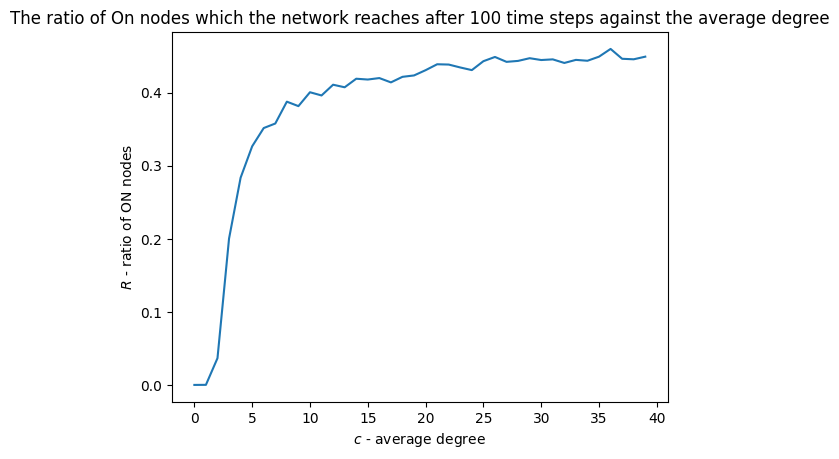

In [7]:
plt.plot(listc,listRAve)
plt.xlabel('$c$ - average degree')
plt.ylabel('$R$ - ratio of ON nodes')
plt.title("The ratio of On nodes which the network reaches after 100 time steps against the average degree")

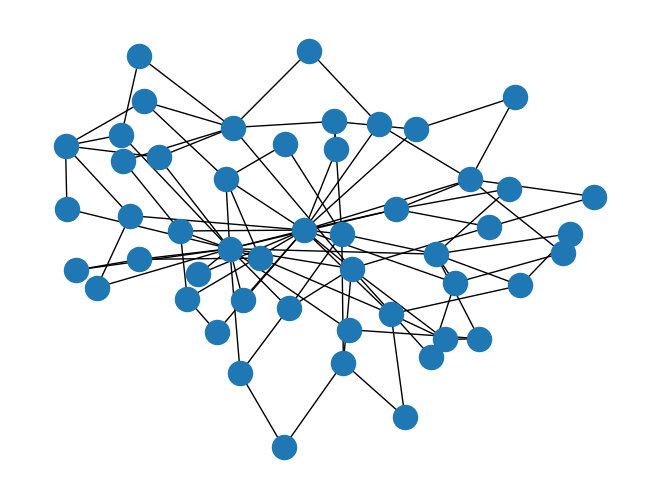

In [10]:
G = nx.barabasi_albert_graph(50,2)
nx.draw(G)